# basic feature examples

In [1]:
from ScriptFeaturizer import scripts_to_tfidf, num_lines
from FeatureUtils import load_scripts

In [2]:
raw_scripts, titles = load_scripts(r'data/scraping/texts/')
X, vocab = scripts_to_tfidf(raw_scripts)
X.shape

/home/bp2221/py/test/venv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cut', 'fade', 'll', 'scene', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1147, 3849)

In [3]:
type(raw_scripts)

list

In [4]:
raw_scripts[0][:1000]

'\n\n\n\nTen Things I Hate About You - by Karen McCullah Lutz & Kirsten Smith\n\n                               TEN THINGS I HATE ABOUT YOU\n          \n                written by Karen McCullah Lutz & Kirsten Smith\n          \n              based on \'Taming of the Shrew" by William Shakespeare\n          \n          Revision November 12, 1997\n          \n          \n          PADUA HIGH SCHOOL - DAY\n          \n          Welcome to Padua High School,, your typical urban-suburban \n          high school in Portland, Oregon.  Smarties, Skids, Preppies, \n          Granolas. Loners, Lovers, the In and the Out Crowd rub sleep \n          out of their eyes and head for the main building.\n          \n          PADUA HIGH PARKING LOT - DAY\n          \n          KAT STRATFORD, eighteen, pretty -- but trying hard not to be \n          -- in a baggy granny dress and glasses, balances a cup of \n          coffee and a backpack as she climbs out of her battered, \n          baby blue \'75 D

In [5]:
# find names in the script


num_lines(raw_scripts[34])

1101

# spacy feature utils examples

In [1]:
from ScriptFeaturizer import scripts_to_tfidf, df_to_stats
from FeatureUtils import load_scripts, make_doc_df, series_to_doc

In [2]:
from datetime import datetime
raw_scripts, titles = load_scripts(r'data/scraping/texts/')

In [9]:
df = make_doc_df(raw_scripts[0])
df

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,ner_obj
0,,,SPACE,_SP,,,False,False,None
1,ten,ten,NUM,CD,nummod,xxx,True,True,TIME
2,things,thing,NOUN,NNS,ROOT,xxxx,True,False,None
3,i,i,PRON,PRP,nsubj,x,True,True,None
4,hate,hate,VERB,VBP,relcl,xxxx,True,False,None
...,...,...,...,...,...,...,...,...,...
19169,user,user,NOUN,NN,compound,xxxx,True,False,None
19170,comments,comment,NOUN,NNS,dobj,xxxx,True,False,None
19171,back,back,ADV,RB,advmod,xxxx,True,True,None
19172,to,to,ADP,IN,prep,xx,True,True,None


In [10]:
df_to_stats(df, 'ner_obj')

(array([ 169,  692,  688,   37,    8,    5,   20,    9,  242, 2757,   35,
           8,  239,    1]),
 array(['CARDINAL', 'DATE', 'FAC', 'GPE', 'LANGUAGE', 'LOC', 'NORP',
        'ORDINAL', 'ORG', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME',
        'WORK_OF_ART'], dtype=object))

In [11]:
lemmatized_text = series_to_doc(df.lemma)
print(lemmatized_text[:100])
test = scripts_to_tfidf([lemmatized_text])
test[1][:10]

  ten thing i hate about -PRON- by karen mccullah lutz kirsten smith ten thing i hate about -PRON- w


/home/bp2221/py/test/venv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cut', 'fade', 'll', 'scene', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['10', '11', '12', '141', '16th', '1995', '1997', '400', '75', '90210']

In [6]:
vects = []
headers = []
for script, title in zip(raw_scripts, titles):
    nw = datetime.now()
    df = make_doc_df(script)
    vect, head = df_to_stats(df, 'ner_obj')
    vects.append(vect)
    headers.append(head)
    print(title, 'done', datetime.now() - nw)

10_Things_I_Hate_About_You done 0:00:03.680390
12 done 0:00:01.202544
127_Hours done 0:00:03.544806
12_Monkeys done 0:00:05.968694
12_Years_a_Slave done 0:00:06.313730
12_and_Holding done 0:00:04.073444
17_Again done 0:00:03.989287
187 done 0:00:06.462321
2001:_A_Space_Odyssey done 0:00:03.653897
2012 done 0:00:04.814214
25th_Hour done 0:00:05.537807
28_Days_Later done 0:00:03.961161
30_Minutes_or_Less done 0:00:05.024994
42 done 0:00:05.786142
44_Inch_Chest done 0:00:04.602709
48_Hrs done 0:00:03.962294
50-50 done 0:00:04.068010
500_Days_of_Summer done 0:00:03.879660
8MM done 0:00:06.481133
9 done 0:00:03.578101
A_Few_Good_Men done 0:00:05.735295
A_Most_Violent_Year done 0:00:05.228479
A_Prayer_Before_Dawn done 0:00:04.530344
A_Quiet_Place done 0:00:04.546309
A_Scanner_Darkly done 0:00:05.870801
A_Serious_Man done 0:00:04.844320
Above_the_Law done 0:00:06.023259
Absolute_Power done 0:00:05.054050
Ace_Ventura:_Pet_Detective done 0:00:03.720128
Adaptation done 0:00:05.809410
Addams_Fami

Cincinnati_Kid done 0:00:05.110453
Cinema_Paradiso done 0:00:06.706872
Cirque_du_Freak:_The_Vampire's_Assistant done 0:00:04.905483
Citizen_Kane done 0:00:07.067328
City_of_Joy done 0:00:05.898130
Clash_of_the_Titans done 0:00:05.180464
Clerks done 0:00:05.213277
Cliffhanger done 0:00:06.359741
Clueless done 0:00:02.918354
Cobb done 0:00:05.047521
Coco done 0:00:04.454084
Code_of_Silence done 0:00:03.831655
Cold_Mountain done 0:00:05.516634
Collateral done 0:00:04.651005
Collateral_Damage done 0:00:05.300906
Colombiana done 0:00:05.448540
Color_of_Night done 0:00:04.124442
Commando done 0:00:03.171827
Conan_the_Barbarian done 0:00:03.593826
Confessions_of_a_Dangerous_Mind done 0:00:05.310493
Confidence done 0:00:05.250668
Constantine done 0:00:03.867147
Cooler done 0:00:03.908379
Copycat done 0:00:04.686597
Coraline done 0:00:04.347219
Coriolanus done 0:00:03.456523
Cowboys_&_Aliens done 0:00:04.664183
Cradle_2_the_Grave done 0:00:03.968480
Crank done 0:00:04.335569
Crash done 0:00:03.

Haunting done 0:00:07.226182
He's_Just_Not_That_Into_You done 0:00:05.691660
Heat done 0:00:07.373444
Heathers done 0:00:06.058029
Heavenly_Creatures done 0:00:06.302029
Heavy_Metal done 0:00:03.776571
Hebrew_Hammer done 0:00:04.873542
Heist done 0:00:07.096244
Hellbound:_Hellraiser_II done 0:00:06.978922
Hellboy done 0:00:05.830359
Hellboy_2:_The_Golden_Army done 0:00:05.666157
Hellraiser done 0:00:04.308388
Hellraiser:_Deader done 0:00:05.493675
Hellraiser:_Hellseeker done 0:00:05.543522
Hellraiser_3:_Hell_on_Earth done 0:00:05.673085
Help done 0:00:07.619195
Henry's_Crime done 0:00:04.572062
Henry_Fool done 0:00:05.797038
Her done 0:00:04.844882
Hesher done 0:00:05.989001
High_Fidelity done 0:00:06.533258
Highlander done 0:00:05.000885
Highlander:_Endgame done 0:00:00.025716
Hills_Have_Eyes done 0:00:04.603382
His_Girl_Friday done 0:00:08.064042
Hitchcock done 0:00:04.736901
Hitchhiker's_Guide_to_the_Galaxy done 0:00:06.018670
Hollow_Man done 0:00:06.261606
Honeydripper done 0:00:04

Mission_Impossible done 0:00:05.460288
Mission_Impossible_II done 0:00:06.310679
Mission_to_Mars done 0:00:06.599766
Moneyball done 0:00:05.947437
Monkeybone done 0:00:04.939286
Monte_Carlo done 0:00:05.679938
Moon done 0:00:05.094966
Moonrise_Kingdom done 0:00:05.182690
Moonstruck done 0:00:05.130251
Mr_Blandings_Builds_His_Dream_House done 0:00:04.276495
Mr_Brooks done 0:00:05.007820
Mr_Deeds_Goes_to_Town done 0:00:04.732296
Mrs done 0:00:04.110824
Mud done 0:00:04.753678
Mulan done 0:00:04.172381
Mulholland_Drive done 0:00:05.091349
Mumford done 0:00:06.276296
Mummy done 0:00:06.352482
Music_of_the_Heart done 0:00:06.349361
Mute_Witness done 0:00:06.262407
My_Best_Friend's_Wedding done 0:00:06.979136
My_Girl done 0:00:03.868133
My_Mother_Dreams_the_Satan's_Disciples_in_New_York done 0:00:01.609661
My_Week_with_Marilyn done 0:00:06.630464
Mystery_Men done 0:00:05.467324
Napoleon_Dynamite done 0:00:01.452515
Nashville done 0:00:04.542487
Never_Been_Kissed done 0:00:00.029002
Neverendi

Spartan done 0:00:06.026632
Speed_Racer done 0:00:05.940687
Sphere done 0:00:05.110842
Spider-Man done 0:00:05.352453
St done 0:00:04.664134
Star_Trek done 0:00:06.815764
Star_Trek:_First_Contact done 0:00:05.771112
Star_Trek:_Generations done 0:00:04.676796
Star_Trek:_Nemesis done 0:00:04.636152
Star_Trek:_The_Motion_Picture done 0:00:06.062677
Star_Trek_II:_The_Wrath_of_Khan done 0:00:04.042676
Star_Wars:_A_New_Hope done 0:00:06.161950
Star_Wars:_Attack_of_the_Clones done 0:00:05.906136
Star_Wars:_Return_of_the_Jedi done 0:00:04.679687
Star_Wars:_Revenge_of_the_Sith done 0:00:06.370261
Star_Wars:_The_Empire_Strikes_Back done 0:00:05.891822
Star_Wars:_The_Force_Awakens done 0:00:05.366974
Star_Wars:_The_Phantom_Menace done 0:00:06.048040
Starman done 0:00:05.610199
Starship_Troopers done 0:00:04.952989
State_and_Main done 0:00:04.641559
Station_West done 0:00:05.167355
Stepmom done 0:00:05.864299
Sting done 0:00:05.465179
Stir_of_Echoes done 0:00:04.951451
Storytelling done 0:00:01.68

In [20]:
import numpy as np

all_h = []
for hd in headers:
    for h in hd:
        if h not in all_h:
            all_h.append(h)
len(all_h)

18

In [41]:
ner_to_idx = {k:v for k, v in zip(all_h, range(18))}
def make_ner_vector(vect, head, ner_to_idx):
    w = np.zeros(len(ner_to_idx))
    for v, h in zip(vect, head):
        w[ner_idx[h]] = v
    return w

ner_matrix = np.array([make_ner_vector(vects[i], headers[i], ner_to_idx) for i in range(len(vects))])
ner_package = tuple([ner_matrix, ner_to_idx, titles])
ner_package[0][:2], ner_package[1], ner_package[2][:2]

(array([[1.690e+02, 6.920e+02, 6.880e+02, 3.700e+01, 8.000e+00, 5.000e+00,
         2.000e+01, 9.000e+00, 2.420e+02, 2.757e+03, 3.500e+01, 8.000e+00,
         2.390e+02, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.100e+01, 1.330e+02, 1.600e+01, 6.600e+01, 0.000e+00, 2.960e+02,
         5.000e+00, 1.500e+01, 1.140e+02, 3.730e+02, 1.000e+00, 6.800e+01,
         1.870e+02, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 {'CARDINAL': 0,
  'DATE': 1,
  'FAC': 2,
  'GPE': 3,
  'LANGUAGE': 4,
  'LOC': 5,
  'NORP': 6,
  'ORDINAL': 7,
  'ORG': 8,
  'PERSON': 9,
  'PRODUCT': 10,
  'QUANTITY': 11,
  'TIME': 12,
  'WORK_OF_ART': 13,
  'EVENT': 14,
  'LAW': 15,
  'MONEY': 16,
  'PERCENT': 17},
 ['10_Things_I_Hate_About_You', '12'])

In [42]:
import pickle

with open(r'data/features/ner_package.pkl', 'wb') as f:
    """Contains 1147 by 18 feature matrix, headers, and titles."""
    pickle.dump(ner_package, f)

# word embeddings example

In [43]:
from gensim.models import Word2Vec
from ScriptFeaturizer import scripts_to_tfidf, scripts_to_embeddings
from FeatureUtils import tokenize_script, load_scripts

In [44]:
from datetime import datetime
raw_scripts, titles = load_scripts(r'data/scraping/texts/')

In [45]:
docs = [tokenize_script(script, stop_words=True) for script in raw_scripts]

### determine the min_count for the Word2Vec model assuming we don't have the memory to process them all.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from spacy.lang.en.stop_words import STOP_WORDS
from FeatureUtils import clean_script

In [47]:
clean_scripts = [clean_script(script) for script in raw_scripts]

In [48]:
cv = CountVectorizer(stop_words='english')
tfs = cv.fit_transform(clean_scripts)

In [50]:
import matplotlib.pyplot as plt

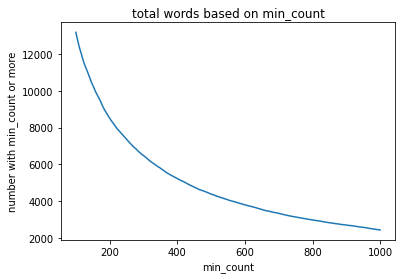

In [51]:
tsums = tfs.sum(axis=0).T
burndown = [tsums[tsums > x].shape[1] for x in range(101, 1001)]
import numpy as np
#tsums[tsums > 2].shape
plt.plot(np.linspace(100, 1000, 900), burndown)
plt.title('total words based on min_count')
plt.xlabel('min_count')
plt.ylabel('number with min_count or more')
plt.show()

In [52]:
len(tsums)

142616

Across all documents, there are 142,616 unique words excluding stop words. 

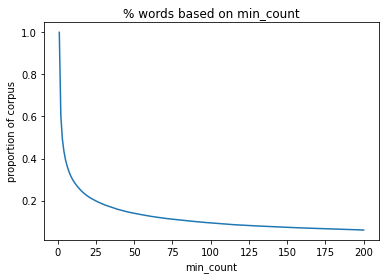

In [53]:
tsums = tfs.sum(axis=0).T
burndown = [tsums[tsums > x].shape[1] / len(tsums) for x in range(0, 200)]
import numpy as np
#tsums[tsums > 2].shape
plt.plot(np.linspace(1, 200, 200), burndown)
plt.title('% words based on min_count')
plt.xlabel('min_count')
plt.ylabel('proportion of corpus')
plt.show()

In [54]:
burndown[:5]

[1.0,
 0.6050092556234925,
 0.49369635945475965,
 0.4357996297750603,
 0.3958742357098783]

Due to the sheer size of thes documents, I think we can live with 50% of the total words in our corpus (across all scripts) being included in the model which comes with a min_count of 3. The reason we want to go lower than the default is because script writers may use unique words that have high signal to predict genre or budget. 

### train word2vec model

In [57]:
from datetime import datetime
nw = datetime.now()
min_count = 2
num_docs = len(docs)
model = Word2Vec(docs, 
                 min_count=min_count, 
                 size=300, 
                 window=5
                )
print(datetime.now() - nw)

0:02:07.365314


In [58]:
import pickle

with open(r'models/word2vec_{}_{}.pkl'.format(min_count, num_docs), 'wb') as f:
    pickle.dump(model, f)
    
